## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

In [2]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid', context='talk')
from prepare_data_function import prepare_data_flights
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Import data to work in Tasks
df_flights_sample = pd.read_csv("../../data/raw/flights_sample.csv")
df = pd.read_csv('../../data/processed/dec_2019_delay_data.csv')

#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

In [4]:
df

fl_date  dep_delay
0       2019-12-01         39
1       2019-12-01         22
2       2019-12-01         -3
3       2019-12-01          2
4       2019-12-01         18
...            ...        ...
673124  2019-12-31         15
673125  2019-12-31         48
673126  2019-12-31         -5
673127  2019-12-31          1
673128  2019-12-02         61

[673129 rows x 2 columns]

In [5]:
df.describe()

dep_delay
count  673129.000000
mean       12.465559
std        51.565875
min       -49.000000
25%        -5.000000
50%        -2.000000
75%         9.000000
max      2710.000000

In [6]:
df['dep_delay'].median()

-2.0

In [7]:
df.isnull().sum()

fl_date      0
dep_delay    0
dtype: int64

In [8]:
dep_delay = df.drop(df[df['dep_delay']>400].index)
dep_delay.head()

fl_date  dep_delay
0  2019-12-01         39
1  2019-12-01         22
2  2019-12-01         -3
3  2019-12-01          2
4  2019-12-01         18

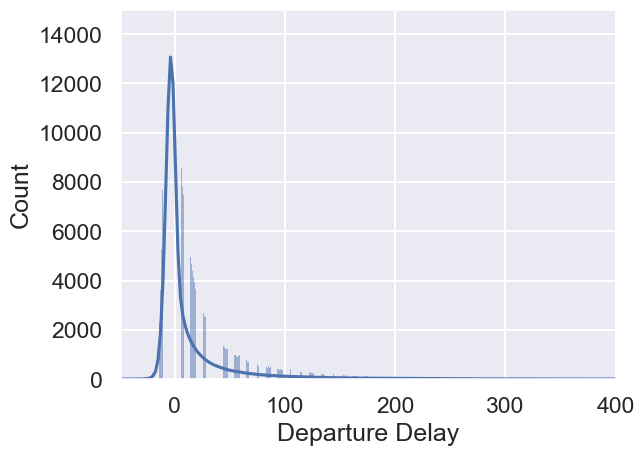

In [9]:
sns.histplot(dep_delay['dep_delay'], kde=True)

# Set the axis limits and labels
plt.xlim(-50, 400)
plt.ylim(0, 15000)
plt.xlabel("Departure Delay")
plt.ylabel("Count")

# Show the plot
plt.show()

Descriptive statistics of the scaled data:
                   0
count  6.715430e+05
mean   4.012220e-17
std    1.000001e+00
min   -1.610176e+00
25%   -4.263454e-01
50%   -3.456297e-01
75%   -4.967210e-02
max    1.047028e+01
Median of the scaled data:
 0   -0.34563
dtype: float64


<AxesSubplot:ylabel='Count'>

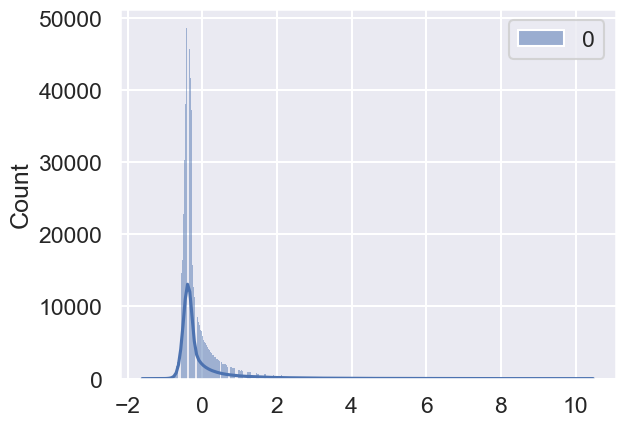

In [10]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Transform the data
scaled_delay = scaler.fit_transform(dep_delay['dep_delay'].values.reshape(-1, 1))

# Convert the scaled data to a DataFrame
scaled_delay = pd.DataFrame(scaled_delay)


# Get the descriptive statistics of the scaled data
desc_stats = scaled_delay.describe()
median = scaled_delay.median()
print("Descriptive statistics of the scaled data:\n", desc_stats)
print("Median of the scaled data:\n", median)

# Create a histogram of the scaled data
sns.histplot(scaled_delay, kde=True)



#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [11]:
df = pd.read_csv('../../data/processed/monthly_average_delay.csv')
df.head()

year  month  avg_departure_delay  avg_arrival_delay  flights_per_month
0  2018      1                 9.66               3.19             600720
1  2018      2                 9.77               4.15             556050
2  2018      3                 7.66               2.13             646045
3  2018      4                 8.35               3.61             641490
4  2018      5                10.72               5.99             663029

In [12]:
df.sort_values(['flights_per_month'],ascending=False).head(10)

year  month  avg_departure_delay  avg_arrival_delay  flights_per_month
19  2019      8                12.70               7.75             705249
18  2019      7                14.23               8.97             703717
6   2018      7                13.44               9.00             689108
7   2018      8                13.96              10.10             687153
21  2019     10                 7.99               2.65             687120
16  2019      5                11.99               7.03             680766
17  2019      6                16.00              11.99             680459
14  2019      3                 9.15               3.49             675943
23  2019     12                12.47               6.44             673129
5   2018      6                13.25               8.83             669405

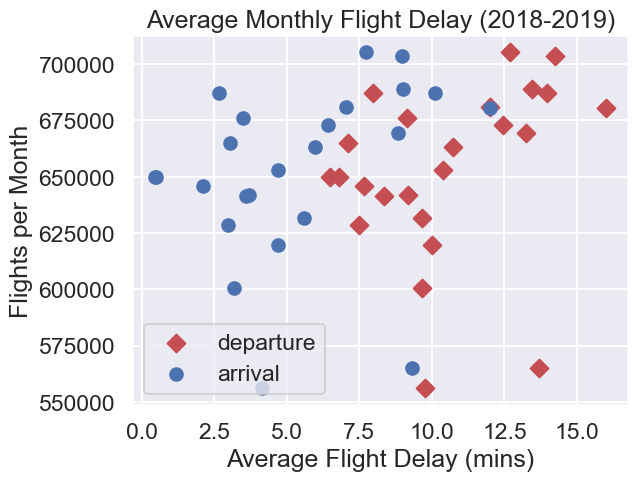

In [13]:
x1 = df['avg_departure_delay']
x2 = df['avg_arrival_delay']
y = df['flights_per_month']

# First Scatter plot
plt.scatter(x1, y, c ="r", marker = 'D', label = 'departure')

#Second Scatter plot
plt.scatter(x2, y, c ="b", marker = 'o', label = 'arrival')

plt.title('Average Monthly Flight Delay (2018-2019)')
plt.legend(loc="lower left")
plt.xlabel('Average Flight Delay (mins)')
plt.ylabel('Flights per Month')

plt.show()

Text(0.5, 1.0, 'Flight Departure Delay per Month')

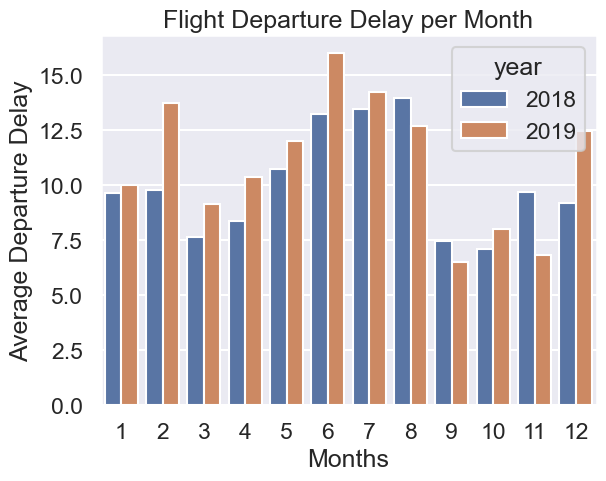

In [14]:
sns.barplot(data=df, x='month', y='avg_departure_delay', hue='year')
 
# labels for x & y axis
plt.xlabel('Months')
plt.ylabel('Average Departure Delay')
 
# title of plot
plt.title('Flight Departure Delay per Month')

Text(0.5, 1.0, 'Flight Arrival Delay per Month')

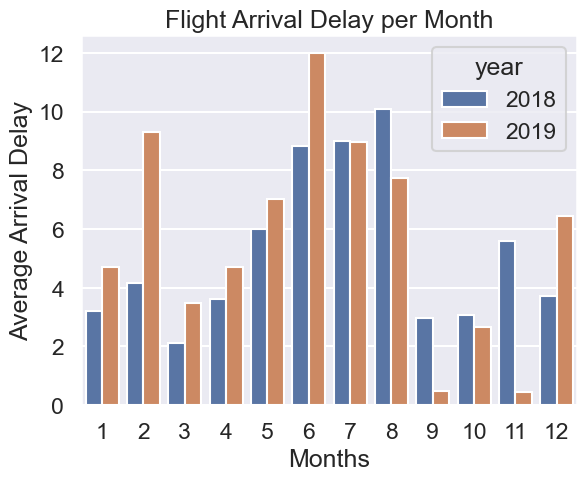

In [15]:
sns.barplot(data=df, x='month', y='avg_arrival_delay', hue='year')
 
# labels for x & y axis
plt.xlabel('Months')
plt.ylabel('Average Arrival Delay')
 
# title of plot
plt.title('Flight Arrival Delay per Month')

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

In [16]:
#Import all the airports from the flight table
df_airports = pd.read_csv("../../data/raw/airportsFlightsTable.csv")

In [17]:
df_airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376 entries, 0 to 375
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   airport_id  376 non-null    int64 
 1   iata_code   376 non-null    object
 2   city        376 non-null    object
dtypes: int64(1), object(2)
memory usage: 8.9+ KB


In [18]:
df_airports

airport_id iata_code                            city
0         10135       ABE  Allentown/Bethlehem/Easton, PA
1         10136       ABI                     Abilene, TX
2         10140       ABQ                 Albuquerque, NM
3         10141       ABR                    Aberdeen, SD
4         10146       ABY                      Albany, GA
..          ...       ...                             ...
371       15991       YAK                     Yakutat, AK
372       16101       YKM                      Yakima, WA
373       16133       YNG           Youngstown/Warren, OH
374       16218       YUM                        Yuma, AZ
375       16869       XWA                   Williston, ND

[376 rows x 3 columns]

In [19]:
#Import geolocation for all the airports (got this information from https://ourairports.com/airports.html)
global_airports = pd.read_csv("../../data/raw/worldAirports.csv")

In [20]:
global_airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35489 entries, 0 to 35488
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 35489 non-null  int64  
 1   ident              35489 non-null  object 
 2   type               35489 non-null  object 
 3   name               35489 non-null  object 
 4   latitude_deg       35489 non-null  float64
 5   longitude_deg      35489 non-null  float64
 6   elevation_ft       30858 non-null  float64
 7   continent          19757 non-null  object 
 8   country_name       35489 non-null  object 
 9   iso_country        35287 non-null  object 
 10  region_name        35489 non-null  object 
 11  iso_region         35489 non-null  object 
 12  local_region       35485 non-null  object 
 13  municipality       31489 non-null  object 
 14  scheduled_service  35489 non-null  int64  
 15  gps_code           23908 non-null  object 
 16  iata_code          802

In [22]:
#Filter information needed
df_global_airports = global_airports[['ident','iata_code','latitude_deg','longitude_deg']]
df_global_airports

ident iata_code  latitude_deg  longitude_deg
0      EGLL       LHR     51.470600      -0.461941
1      KLAX       LAX     33.942501    -118.407997
2      KORD       ORD     41.978600     -87.904800
3      KJFK       JFK     40.639447     -73.779317
4      KATL       ATL     33.636700     -84.428101
...     ...       ...           ...            ...
35484  CMB7       NaN     45.253000     -74.807000
35485  12CN       NaN     39.268306    -122.116689
35486  8CL6       NaN     39.288502    -122.189003
35487  0ID2       NaN     44.442902    -113.773003
35488   0U8       NaN     44.610199    -113.896004

[35489 rows x 4 columns]

In [23]:
#add latitude and longitude to my airports dataset

df_airports_merged = df_airports.merge(df_global_airports, on = 'iata_code', how = 'inner' )
df_airports_merged = df_airports_merged.drop(columns=['city','ident'])
df_airports_merged

airport_id iata_code  latitude_deg  longitude_deg
0         10135       ABE     40.651773     -75.442797
1         10136       ABI     32.411301     -99.681900
2         10140       ABQ     35.040199    -106.609001
3         10141       ABR     45.449100     -98.421799
4         10146       ABY     31.532946     -84.196215
..          ...       ...           ...            ...
369       15991       YAK     59.508717    -139.660435
370       16101       YKM     46.568199    -120.543999
371       16133       YNG     41.260700     -80.679100
372       16218       YUM     32.656601    -114.606003
373       16869       XWA     48.258387    -103.748797

[374 rows x 4 columns]

In [24]:
df_flights_imp = pd.read_csv("../../data/raw/flightsWeatherSample_w.csv")
df_flights_sample = df_flights_imp
df_flights_sample

fl_date mkt_unique_carrier tail_num  op_carrier_fl_num  \
0    2019-03-21                 DL   N390CA               6248   
1    2018-07-05                 DL   N264SY               4690   
2    2018-02-09                 HA   N382HA                465   
3    2018-12-09                 DL   N921EV               3855   
4    2019-12-24                 AA   N902EV               3115   
..          ...                ...      ...                ...   
195  2018-12-26                 AA   N950LR               5849   
196  2019-03-09                 UA   N88325               6017   
197  2019-05-11                 UA   N24103               4142   
198  2018-05-15                 DL   N380DA               2164   
199  2019-07-19                 DL   N659BR               4756   

     origin_airport_id origin                    origin_city_name  \
0                13296    MHT                      Manchester, NH   
1                11057    CLT                       Charlotte, NC   
2                12173    HNL                        Honolulu, HI   
3                15323    TRI  Bristol/Johnson City/Kingsport, TN   
4                10874    CAK                           Akron, OH   
..                 ...    ...                                 ...   
195              13851    OKC                   Oklahoma City, OK   
196              12266    IAH                         Houston, TX   
197              14193    PNS                       Pensacola, FL   
198              12478    JFK                        New York, NY   
199              11433    DTW                         Detroit, MI   

     dest_airport_id dest         dest_city_name  weather_delay_r  
0              11433  DTW            Detroit, MI             2900  
1              12478  JFK           New York, NY             2692  
2              14222  PPG          Pago Pago, TT             2475  
3              10397  ATL            Atlanta, GA             2098  
4              13930  ORD            Chicago, IL             1847  
..               ...  ...                    ...              ...  
195            11298  DFW  Dallas/Fort Worth, TX             1103  
196            12992  LIT        Little Rock, AR             1103  
197            12266  IAH            Houston, TX             1102  
198            14683  SAT        San Antonio, TX             1100  
199            14696  SBN         South Bend, IN             1099  

[200 rows x 11 columns]

In [25]:
df_flights_sample.rename(columns={'origin': 'iata_code','dest': 'iata_code2'}, inplace=True)
df_flights_sample['fl_date'] = df_flights_sample['fl_date'].astype('datetime64')
df_flights_sample[['city','state']] = df_flights_sample['origin_city_name'].str.split(', ', expand=True)
df_flights_sample.drop(columns=['origin_city_name', 'dest_city_name'], inplace=True)
df_flights_sample

fl_date mkt_unique_carrier tail_num  op_carrier_fl_num  \
0   2019-03-21                 DL   N390CA               6248   
1   2018-07-05                 DL   N264SY               4690   
2   2018-02-09                 HA   N382HA                465   
3   2018-12-09                 DL   N921EV               3855   
4   2019-12-24                 AA   N902EV               3115   
..         ...                ...      ...                ...   
195 2018-12-26                 AA   N950LR               5849   
196 2019-03-09                 UA   N88325               6017   
197 2019-05-11                 UA   N24103               4142   
198 2018-05-15                 DL   N380DA               2164   
199 2019-07-19                 DL   N659BR               4756   

     origin_airport_id iata_code  dest_airport_id iata_code2  weather_delay_r  \
0                13296       MHT            11433        DTW             2900   
1                11057       CLT            12478        JFK             2692   
2                12173       HNL            14222        PPG             2475   
3                15323       TRI            10397        ATL             2098   
4                10874       CAK            13930        ORD             1847   
..                 ...       ...              ...        ...              ...   
195              13851       OKC            11298        DFW             1103   
196              12266       IAH            12992        LIT             1103   
197              14193       PNS            12266        IAH             1102   
198              12478       JFK            14683        SAT             1100   
199              11433       DTW            14696        SBN             1099   

                               city state  
0                        Manchester    NH  
1                         Charlotte    NC  
2                          Honolulu    HI  
3    Bristol/Johnson City/Kingsport    TN  
4                             Akron    OH  
..                              ...   ...  
195                   Oklahoma City    OK  
196                         Houston    TX  
197                       Pensacola    FL  
198                        New York    NY  
199                         Detroit    MI  

[200 rows x 11 columns]

In [26]:
df_flights_merged = df_flights_sample.merge(df_airports_merged, on='iata_code', how='left')
df_flights_merged.rename(columns={'latitude_deg':'lat','longitude_deg':'lon'},inplace= True)

In [27]:
df_flights_merged

fl_date mkt_unique_carrier tail_num  op_carrier_fl_num  \
0   2019-03-21                 DL   N390CA               6248   
1   2018-07-05                 DL   N264SY               4690   
2   2018-02-09                 HA   N382HA                465   
3   2018-12-09                 DL   N921EV               3855   
4   2019-12-24                 AA   N902EV               3115   
..         ...                ...      ...                ...   
195 2018-12-26                 AA   N950LR               5849   
196 2019-03-09                 UA   N88325               6017   
197 2019-05-11                 UA   N24103               4142   
198 2018-05-15                 DL   N380DA               2164   
199 2019-07-19                 DL   N659BR               4756   

     origin_airport_id iata_code  dest_airport_id iata_code2  weather_delay_r  \
0                13296       MHT            11433        DTW             2900   
1                11057       CLT            12478        JFK             2692   
2                12173       HNL            14222        PPG             2475   
3                15323       TRI            10397        ATL             2098   
4                10874       CAK            13930        ORD             1847   
..                 ...       ...              ...        ...              ...   
195              13851       OKC            11298        DFW             1103   
196              12266       IAH            12992        LIT             1103   
197              14193       PNS            12266        IAH             1102   
198              12478       JFK            14683        SAT             1100   
199              11433       DTW            14696        SBN             1099   

                               city state  airport_id        lat         lon  
0                        Manchester    NH       13296  42.932598  -71.435699  
1                         Charlotte    NC       11057  35.214001  -80.943100  
2                          Honolulu    HI       12173  21.320620 -157.924228  
3    Bristol/Johnson City/Kingsport    TN       15323  36.475201  -82.407401  
4                             Akron    OH       10874  40.916100  -81.442200  
..                              ...   ...         ...        ...         ...  
195                   Oklahoma City    OK       13851  35.393101  -97.600700  
196                         Houston    TX       12266  29.984400  -95.341400  
197                       Pensacola    FL       14193  30.473400  -87.186600  
198                        New York    NY       12478  40.639447  -73.779317  
199                         Detroit    MI       11433  42.212399  -83.353401  

[200 rows x 14 columns]

In [28]:
#Import meteostast library and datetime (For mor information about this library go to https://meteostat.net/en/)
from datetime import datetime
from meteostat import Point, Daily

start = datetime(2018, 1, 1) # Change start date
end = datetime(2019, 12, 31) # Change end date

In [29]:
#use weather library meteostat
#Be carefull this library is not availble all the time and generate connection errors
weather_dfs=[]
def get_bulk_weather(df):
    for i,r in df.iterrows():
        point = Point(r.lat, r.lon)
        data = Daily(point, start, end)#,params=['temp','prcp','wspd','tsun','snow'])
        data = data.fetch()
        data["lat"] = r.lat
        data["lon"] = r.lon
        weather_dfs.append(data)
        #print(data)
    weather_final = pd.concat(weather_dfs)
    return weather_final 

df_weather = get_bulk_weather(df_flights_merged)
df_weather

tavg  tmin  tmax  prcp   snow   wdir  wspd  wpgt    pres  tsun  \
2018-01-01 -16.6 -21.1 -11.7   0.0  300.0  294.0  18.5   NaN  1024.9   NaN   
2018-01-02 -16.0 -26.1  -8.3   0.0  300.0    NaN   5.8   NaN  1024.1   NaN   
2018-01-03  -9.1 -16.1  -1.1   0.0  280.0    NaN   4.8   NaN  1024.3   NaN   
2018-01-04  -7.3 -15.6  -3.3  18.8  280.0  321.0  26.7   NaN   998.5   NaN   
2018-01-05 -11.2 -16.1  -6.1   0.0  530.0  279.0  23.2   NaN     NaN   NaN   
...          ...   ...   ...   ...    ...    ...   ...   ...     ...   ...   
2019-12-27   8.3   3.3  13.9   0.0    0.0  266.0  18.2   NaN  1020.6   NaN   
2019-12-28   3.0   1.1   6.1   0.0    0.0    NaN   8.6   NaN  1024.5   NaN   
2019-12-29   7.7   3.9  10.0  29.0    0.0   89.0  10.5   NaN  1010.1   NaN   
2019-12-30   5.5   1.7   9.4   1.4    0.0  218.0  28.8   NaN   997.8   NaN   
2019-12-31  -1.0  -2.0   0.0   0.0   10.0  235.0  32.4   NaN  1002.9   NaN   

                  lat        lon  
2018-01-01  42.932598 -71.435699  
2018-01-02  42.932598 -71.435699  
2018-01-03  42.932598 -71.435699  
2018-01-04  42.932598 -71.435699  
2018-01-05  42.932598 -71.435699  
...               ...        ...  
2019-12-27  42.212399 -83.353401  
2019-12-28  42.212399 -83.353401  
2019-12-29  42.212399 -83.353401  
2019-12-30  42.212399 -83.353401  
2019-12-31  42.212399 -83.353401  

[143037 rows x 12 columns]

In [30]:
#Create local file to avoid issue with library
from pathlib import Path  
filepath = Path('../../data/raw/weatherSampleNew.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df_weather.to_csv(filepath)  

In [31]:
#Read weather from local csv to avoid calling the library everytime with the historic data
df_weather_f= pd.read_csv("../../data/raw/weatherSample.csv")  

In [32]:
df_flights_merged['Key'] = df_flights_merged['lat'].astype(str) +'-'+df_flights_merged['lat'].astype(str) 
df_flights_merged

fl_date mkt_unique_carrier tail_num  op_carrier_fl_num  \
0   2019-03-21                 DL   N390CA               6248   
1   2018-07-05                 DL   N264SY               4690   
2   2018-02-09                 HA   N382HA                465   
3   2018-12-09                 DL   N921EV               3855   
4   2019-12-24                 AA   N902EV               3115   
..         ...                ...      ...                ...   
195 2018-12-26                 AA   N950LR               5849   
196 2019-03-09                 UA   N88325               6017   
197 2019-05-11                 UA   N24103               4142   
198 2018-05-15                 DL   N380DA               2164   
199 2019-07-19                 DL   N659BR               4756   

     origin_airport_id iata_code  dest_airport_id iata_code2  weather_delay_r  \
0                13296       MHT            11433        DTW             2900   
1                11057       CLT            12478        JFK             2692   
2                12173       HNL            14222        PPG             2475   
3                15323       TRI            10397        ATL             2098   
4                10874       CAK            13930        ORD             1847   
..                 ...       ...              ...        ...              ...   
195              13851       OKC            11298        DFW             1103   
196              12266       IAH            12992        LIT             1103   
197              14193       PNS            12266        IAH             1102   
198              12478       JFK            14683        SAT             1100   
199              11433       DTW            14696        SBN             1099   

                               city state  airport_id        lat         lon  \
0                        Manchester    NH       13296  42.932598  -71.435699   
1                         Charlotte    NC       11057  35.214001  -80.943100   
2                          Honolulu    HI       12173  21.320620 -157.924228   
3    Bristol/Johnson City/Kingsport    TN       15323  36.475201  -82.407401   
4                             Akron    OH       10874  40.916100  -81.442200   
..                              ...   ...         ...        ...         ...   
195                   Oklahoma City    OK       13851  35.393101  -97.600700   
196                         Houston    TX       12266  29.984400  -95.341400   
197                       Pensacola    FL       14193  30.473400  -87.186600   
198                        New York    NY       12478  40.639447  -73.779317   
199                         Detroit    MI       11433  42.212399  -83.353401   

                                       Key  
0                      42.932598-42.932598  
1        35.2140007019043-35.2140007019043  
2                        21.32062-21.32062  
3                      36.475201-36.475201  
4      40.91609954833984-40.91609954833984  
..                                     ...  
195                    35.393101-35.393101  
196  29.984399795532227-29.984399795532227  
197                        30.4734-30.4734  
198                    40.639447-40.639447  
199  42.212398529052734-42.212398529052734  

[200 rows x 15 columns]

In [33]:
df_weather_f['Key'] = df_weather_f['lat'].astype(str) +'-'+df_weather_f['lat'].astype(str)
df_weather_f = df_weather_f.drop(columns=['tmin','tmax','wdir','pres','wpgt','lat','lon','tsun']) 

In [34]:
df_weather_f.rename(columns={'Unnamed: 0' :'fl_date','tavg':'AvgTemp', 'prcp':'Precipitation', 'snow':'Snow_mm','wspd':'WindSpeed','tsun':'SunTime'}, inplace=True)
df_weather_f['fl_date'] = df_weather_f['fl_date'].astype('datetime64[ns]')
df_weather_f.drop_duplicates()
df_weather_f

fl_date  AvgTemp  Precipitation  Snow_mm  WindSpeed  \
0      2018-01-01    -16.6            0.0    300.0       18.5   
1      2018-01-02    -16.0            0.0    300.0        5.8   
2      2018-01-03     -9.1            0.0    280.0        4.8   
3      2018-01-04     -7.3           18.8    280.0       26.7   
4      2018-01-05    -11.2            0.0    530.0       23.2   
...           ...      ...            ...      ...        ...   
143032 2019-12-27      8.3            0.0      0.0       18.2   
143033 2019-12-28      3.0            0.0      0.0        8.6   
143034 2019-12-29      7.7           29.0      0.0       10.5   
143035 2019-12-30      5.5            1.4      0.0       28.8   
143036 2019-12-31     -1.0            0.0     10.0       32.4   

                                          Key  
0                         42.932598-42.932598  
1                         42.932598-42.932598  
2                         42.932598-42.932598  
3                         42.932598-42.932598  
4                         42.932598-42.932598  
...                                       ...  
143032  42.212398529052734-42.212398529052734  
143033  42.212398529052734-42.212398529052734  
143034  42.212398529052734-42.212398529052734  
143035  42.212398529052734-42.212398529052734  
143036  42.212398529052734-42.212398529052734  

[143037 rows x 6 columns]

In [35]:
flights_weather_merge = df_flights_merged.merge(df_weather_f, on=['Key','fl_date'], how='left')
flights_weather_merge.fillna(0, inplace=True)
flights_weather_merge.drop_duplicates(inplace=True)
flights_weather_merge

fl_date mkt_unique_carrier tail_num  op_carrier_fl_num  \
0   2019-03-21                 DL   N390CA               6248   
1   2018-07-05                 DL   N264SY               4690   
2   2018-02-09                 HA   N382HA                465   
4   2018-12-09                 DL   N921EV               3855   
5   2019-12-24                 AA   N902EV               3115   
..         ...                ...      ...                ...   
583 2018-12-26                 AA   N950LR               5849   
585 2019-03-09                 UA   N88325               6017   
586 2019-05-11                 UA   N24103               4142   
587 2018-05-15                 DL   N380DA               2164   
593 2019-07-19                 DL   N659BR               4756   

     origin_airport_id iata_code  dest_airport_id iata_code2  weather_delay_r  \
0                13296       MHT            11433        DTW             2900   
1                11057       CLT            12478        JFK             2692   
2                12173       HNL            14222        PPG             2475   
4                15323       TRI            10397        ATL             2098   
5                10874       CAK            13930        ORD             1847   
..                 ...       ...              ...        ...              ...   
583              13851       OKC            11298        DFW             1103   
585              12266       IAH            12992        LIT             1103   
586              14193       PNS            12266        IAH             1102   
587              12478       JFK            14683        SAT             1100   
593              11433       DTW            14696        SBN             1099   

                               city state  airport_id        lat         lon  \
0                        Manchester    NH       13296  42.932598  -71.435699   
1                         Charlotte    NC       11057  35.214001  -80.943100   
2                          Honolulu    HI       12173  21.320620 -157.924228   
4    Bristol/Johnson City/Kingsport    TN       15323  36.475201  -82.407401   
5                             Akron    OH       10874  40.916100  -81.442200   
..                              ...   ...         ...        ...         ...   
583                   Oklahoma City    OK       13851  35.393101  -97.600700   
585                         Houston    TX       12266  29.984400  -95.341400   
586                       Pensacola    FL       14193  30.473400  -87.186600   
587                        New York    NY       12478  40.639447  -73.779317   
593                         Detroit    MI       11433  42.212399  -83.353401   

                                       Key  AvgTemp  Precipitation  Snow_mm  \
0                      42.932598-42.932598      4.6            0.0    130.0   
1        35.2140007019043-35.2140007019043     29.2            0.0      0.0   
2                        21.32062-21.32062     21.6            0.0      0.0   
4                      36.475201-36.475201      0.6           38.9    130.0   
5      40.91609954833984-40.91609954833984      2.3            0.0      0.0   
..                                     ...      ...            ...      ...   
583                    35.393101-35.393101     12.8           69.1      0.0   
585  29.984399795532227-29.984399795532227     23.8            0.0      0.0   
586                        30.4734-30.4734     25.5            0.8      0.0   
587                    40.639447-40.639447     17.2           11.2      0.0   
593  42.212398529052734-42.212398529052734     27.8           43.6      0.0   

     WindSpeed  
0         11.2  
1          8.6  
2         13.7  
4          9.0  
5          7.2  
..         ...  
583       29.2  
585       15.5  
586       15.5  
587       17.6  
593       11.7  

[200 rows x 19 columns]

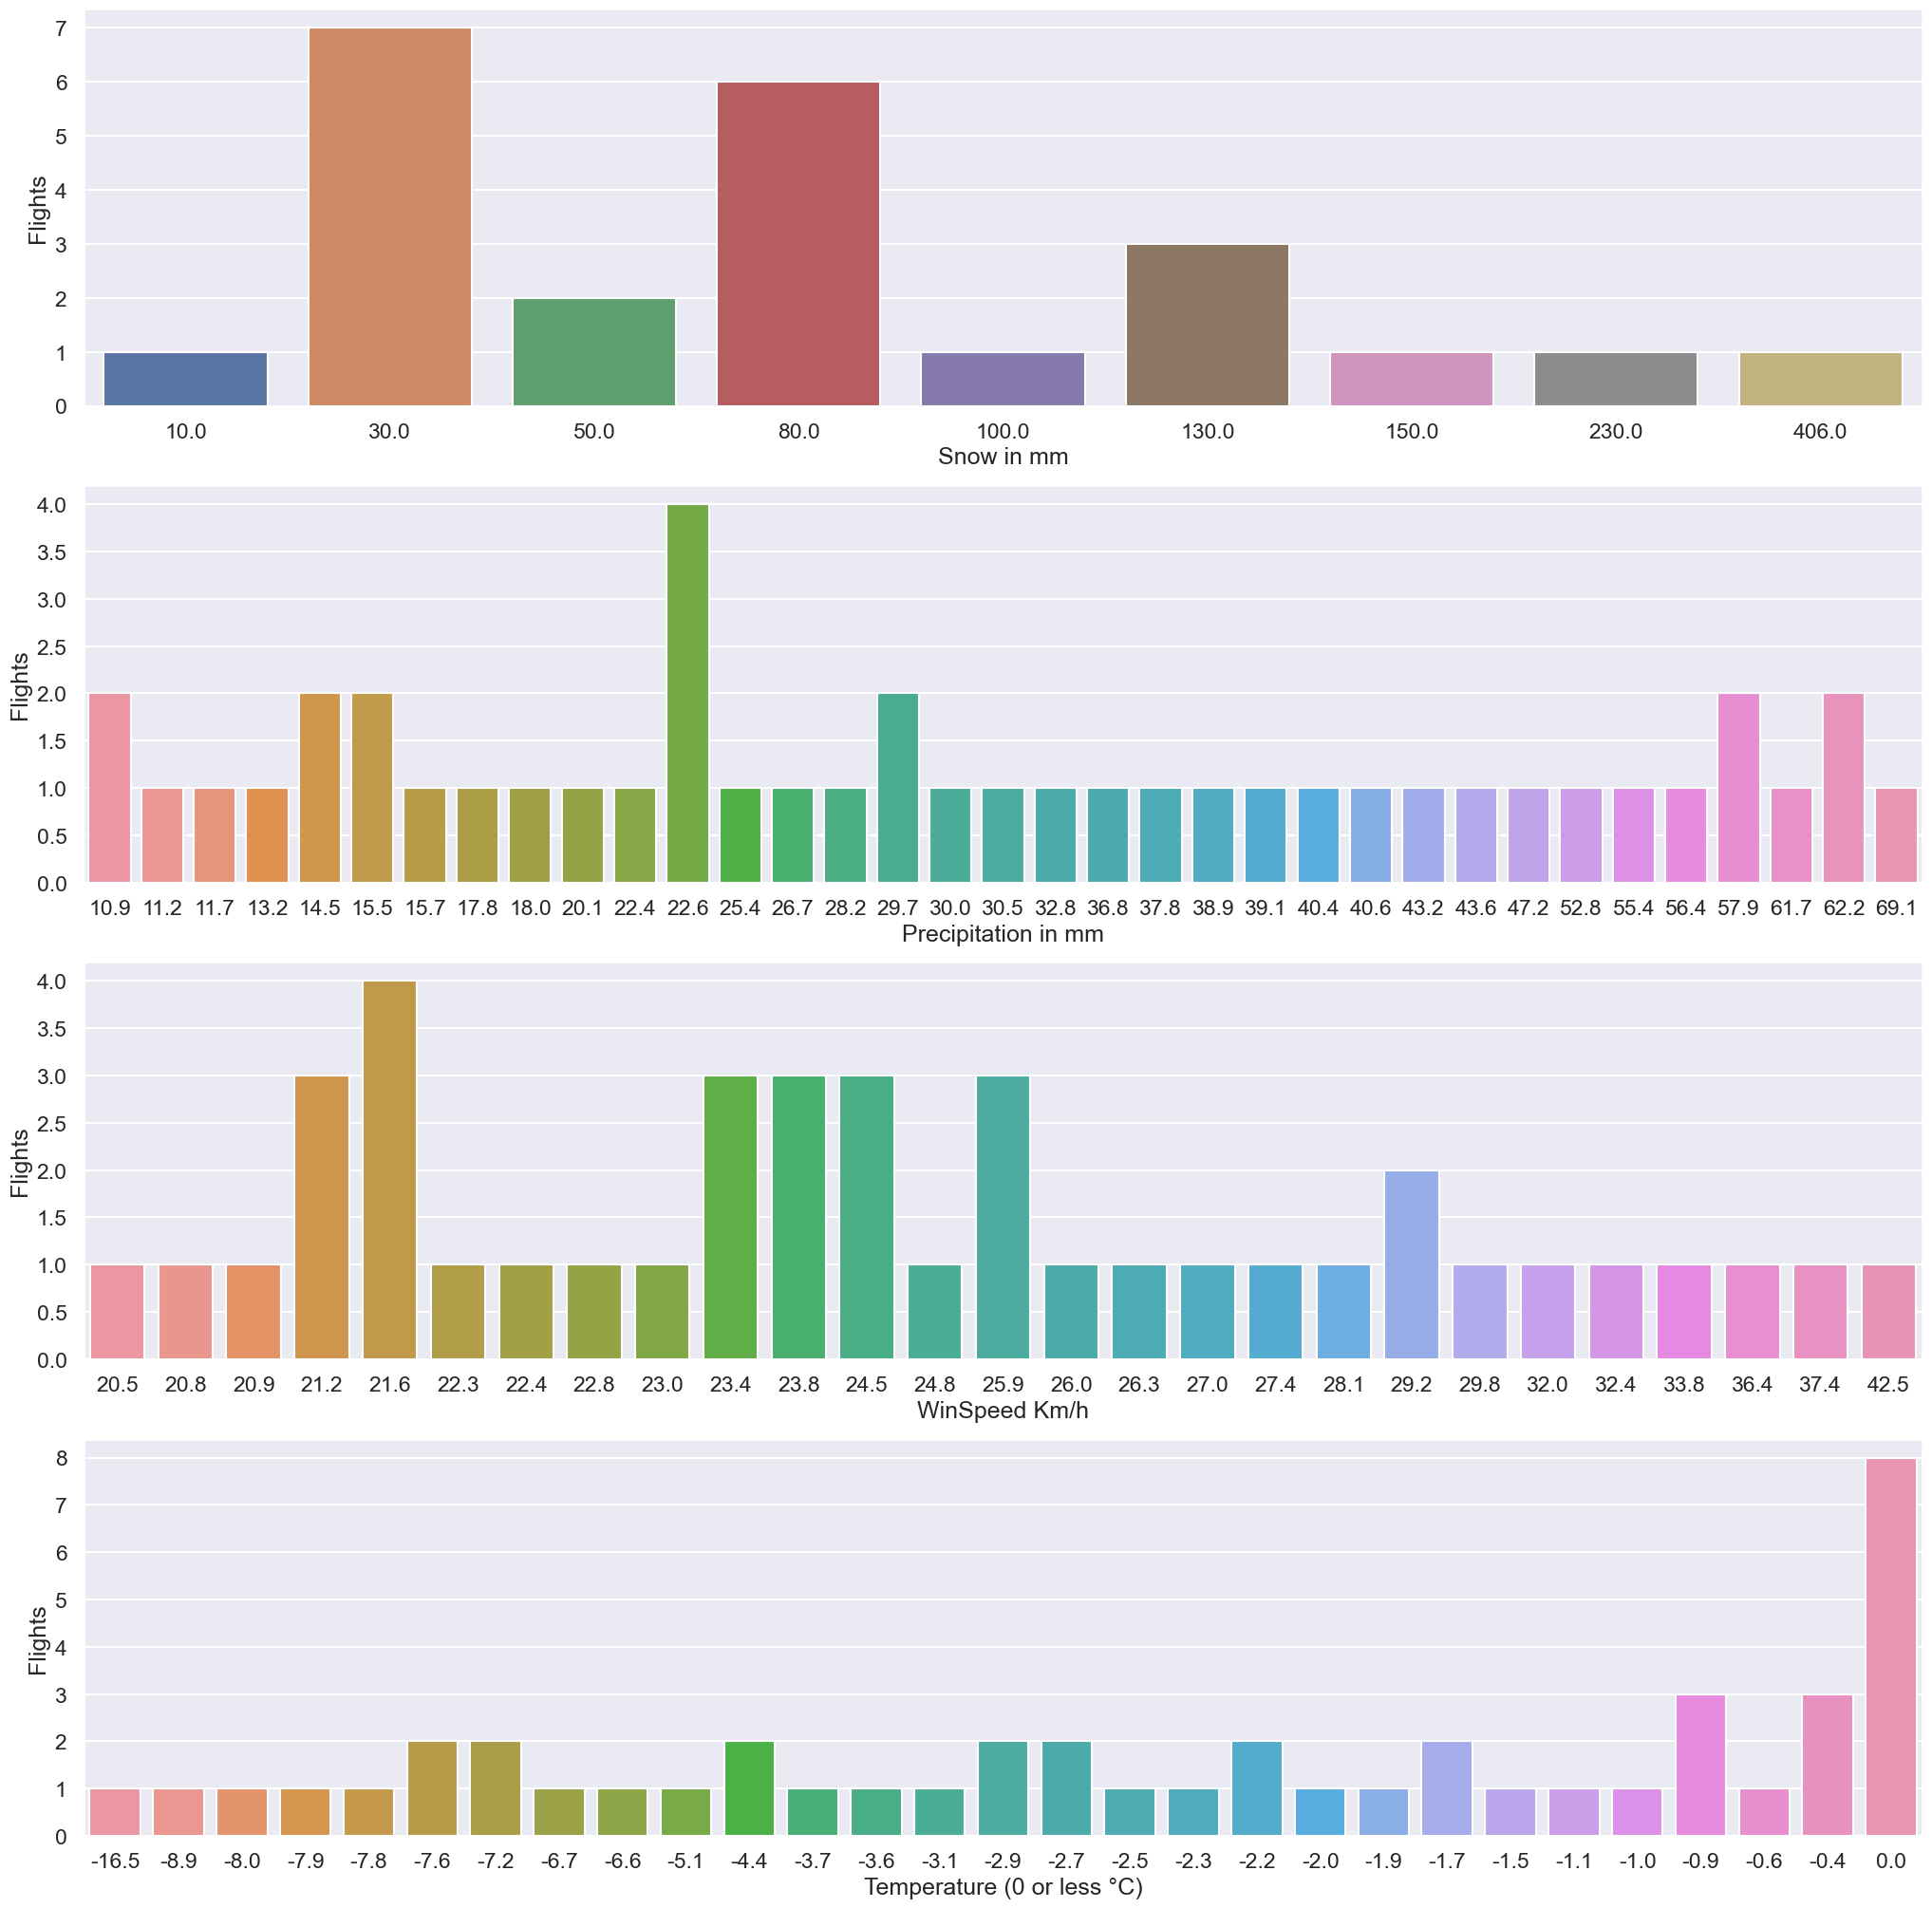

In [37]:
fig, ax = plt.subplots(4, 1, figsize=(25, 25))#, sharey=True)


sns.countplot(x='Snow_mm', data=flights_weather_merge[flights_weather_merge['Snow_mm']>0], ax=ax[0])
ax[0].set(xlabel='Snow in mm', ylabel='Flights')


sns.countplot(x='Precipitation', data=flights_weather_merge[flights_weather_merge['Precipitation']>10], ax=ax[1])
ax[1].set(xlabel='Precipitation in mm', ylabel='Flights')

sns.countplot(x='WindSpeed', data=flights_weather_merge[flights_weather_merge['WindSpeed']>20], ax=ax[2])
ax[2].set(xlabel='WinSpeed Km/h', ylabel='Flights')
#For the wind speed I used the minimun that is considered to affect an airplane. Close to 50Km/h is dangerous and could cause the plane to delay landing or departure.
#https://www.skyscanner.com/tips-and-inspiration/what-windspeed-delays-flights


sns.countplot(x='AvgTemp', data=flights_weather_merge[flights_weather_merge['AvgTemp']<=0], ax=ax[3])
ax[3].set(xlabel='Temperature (0 or less °C)', ylabel='Flights')


plt.show()


#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [40]:
#Clean data with prepare_data_flight custom function
df_flights_sample = pd.read_csv("../../data/raw/flights_sample.csv")
df_flights_clean = prepare_data_flights(df_flights_sample)
df_flights_clean

FlightDate UniqueMarketingCarrierCode  \
0     2018-06-22                         DL   
1     2018-04-03                         AA   
2     2019-11-24                         DL   
3     2018-01-24                         DL   
4     2018-09-23                         HA   
...          ...                        ...   
99995 2018-05-10                         DL   
99996 2019-10-28                         F9   
99997 2019-10-01                         DL   
99998 2018-10-15                         UA   
99999 2019-10-14                         AA   

      UniqueScheduledOperatingCarrierCode TailNumber  FlightNumber OriginIATA  \
0                                      DL     N958DL          2718        ATL   
1                                      OO     N908EV          3261        ORD   
2                                      DL     N931DN          2293        ATL   
3                                      YX     N216JQ          6155        LGA   
4                                      HA     N490HA           229        KOA   
...                                   ...        ...           ...        ...   
99995                                  OO     N8923A          4698        ILM   
99996                                  F9     N351FR           778        LAS   
99997                                  DL     N923AT          1958        ATL   
99998                                  UA     N26215          2144        DEN   
99999                                  AA     N581UW          1939        CLT   

      DestinationIATA DepartureTime ActualDeparture  Delay_Departure  ...  \
0                 BHM         09:58           00:07            209.0  ...   
1                 FWA         06:49           06:51              2.0  ...   
2                 ELP         08:38           08:35             -3.0  ...   
3                 DCA         06:00           05:13             -7.0  ...   
4                 OGG         17:00           16:49            -11.0  ...   
...               ...           ...             ...              ...  ...   
99995             ATL         18:25           18:57             32.0  ...   
99996             DEN         15:22           15:14             -8.0  ...   
99997             ORD         01:33           01:28             -5.0  ...   
99998             FSD         05:05           08:29            124.0  ...   
99999             MCO         03:19           03:20              1.0  ...   

       first_dep_time  total_add_gtime  longest_add_gtime  OriginCity  \
0                 NaN              NaN                NaN     Atlanta   
1                 NaN              NaN                NaN     Chicago   
2                 NaN              NaN                NaN     Atlanta   
3                 NaN              NaN                NaN    New York   
4                 NaN              NaN                NaN        Kona   
...               ...              ...                ...         ...   
99995             NaN              NaN                NaN  Wilmington   
99996             NaN              NaN                NaN   Las Vegas   
99997             NaN              NaN                NaN     Atlanta   
99998             NaN              NaN                NaN      Denver   
99999             NaN              NaN                NaN   Charlotte   

      OriginState  DestinationCity  DestinationState  FlightDay FlightMonth  \
0              GA       Birmingham                AL         22           6   
1              IL       Fort Wayne                IN          3           4   
2              GA          El Paso                TX         24          11   
3              NY       Washington                DC         24           1   
4              HI          Kahului                HI         23           9   
...           ...              ...               ...        ...         ...   
99995          NC          Atlanta                GA         10           5   
99996          NV           Denver

In [41]:
#Get data related to taxi times
df_taxi = df_flights_clean[['FlightDate','DepartureTime','taxi_out','taxi_in','ArrivalTime','OriginCity']]
df_taxi[['hourD','minD']] = df_taxi['DepartureTime'].str.split(':', expand=True)
df_taxi[['hourA','minA']] = df_taxi['ArrivalTime'].str.split(':', expand=True)

df_taxi['hourD'] = pd.to_numeric(df_taxi['hourD'])
df_taxi['hourA'] = pd.to_numeric(df_taxi['hourA'])

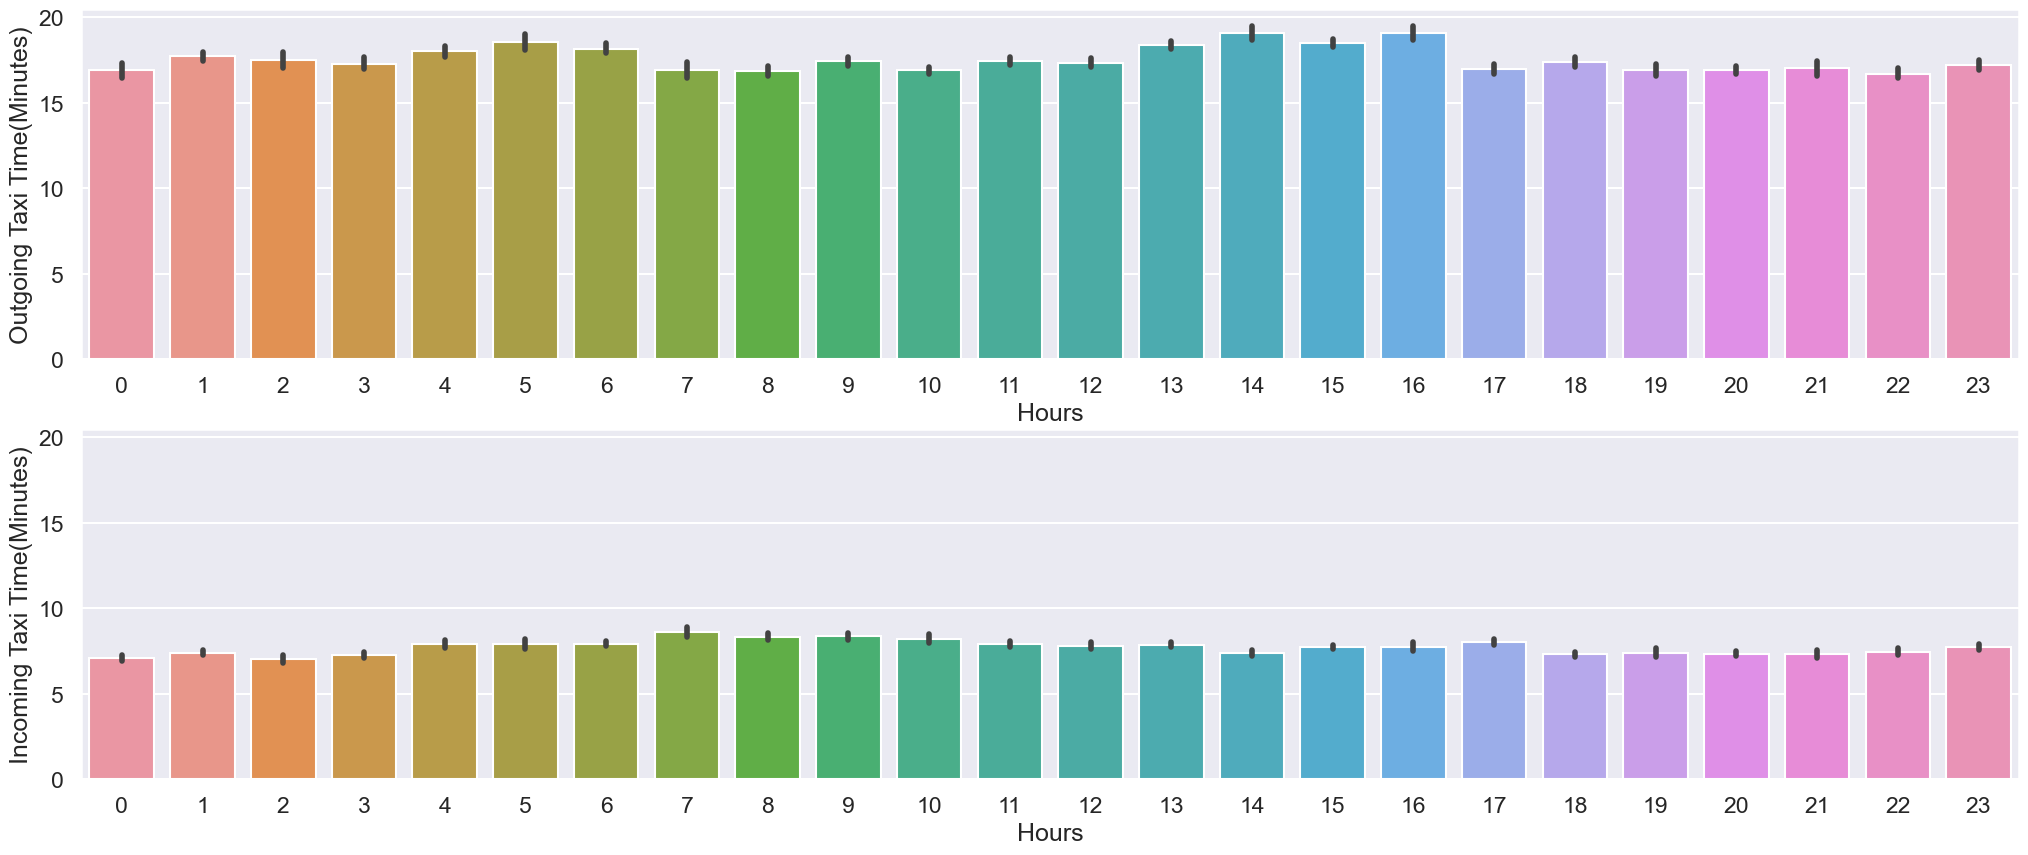

In [42]:
fig, ax = plt.subplots(2, 1, figsize=(25, 10), sharey=True)

sns.barplot(x='hourD', y='taxi_out', data=df_taxi, ax=ax[0])#,ax.set(xlabel='common xlabel', ylabel='common ylabel' )

ax[0].set(xlabel='Hours', ylabel='Outgoing Taxi Time(Minutes)')



sns.barplot(x='hourA', y='taxi_in', data=df_taxi, ax=ax[1])

ax[1].set(xlabel='Hours', ylabel='Incoming Taxi Time(Minutes)')
plt.show()

In [43]:
# Taxi time vs flights
df_taxi_calc = df_taxi[['taxi_out','hourD']]
df_taxi_calc['FlightIndicator'] = 'F'
df_time_taxi_departures = df_taxi_calc.groupby(['hourD','taxi_out']).count().reset_index()

df_time_taxi_departures_f = df_time_taxi_departures.groupby(['hourD']).sum().reset_index()
df_time_taxi_departures_f.sort_values(by=['taxi_out'], ascending=False)

hourD  taxi_out  FlightIndicator
1       1    4785.0             6094
6       6    4453.0             5558
4       4    4180.0             4038
8       8    4147.0             5018
5       5    3965.0             2373
3       3    3816.0             3696
20     20    3728.0             6158
10     10    3704.0             8464
23     23    3599.0             4042
9       9    3497.0             4321
18     18    3473.0             4047
15     15    3439.0             6039
13     13    3411.0             6261
11     11    3183.0             5981
12     12    3158.0             4618
22     22    3146.0             3801
2       2    2977.0             1876
0       0    2862.0             2049
16     16    2823.0             2269
21     21    2790.0             1865
17     17    2693.0             3812
14     14    2688.0             2314
7       7    2631.0             1596
19     19    1904.0             2012

- It looks like that a higher traffic leads to higher taxi time, but in some data points it doesn't show a clear relationship.

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [15]:
df = pd.read_csv('../../data/processed/arrival_departure_status.csv')
df

departure_status   arrival_status  no_of_flights  percent_breakdown  \
0    Early Departure    Early Arrival        7981790              50.11   
1     Late Departure     Late Arrival        3900977              24.49   
2    Early Departure     Late Arrival        1374663               8.63   
3     Late Departure    Early Arrival        1308835               8.22   
4  On Time Departure    Early Arrival         551015               3.46   
5  On Time Departure  On Time Arrival         284819               1.79   
6  On Time Departure     Late Arrival         199969               1.26   
7    Early Departure  On Time Arrival         192591               1.21   
8     Late Departure  On Time Arrival         132826               0.83   

   avg_dep_delay  avg_arr_delay  avg_time_saved_in_air  
0          -5.59         -14.55                   8.96  
1          52.94          51.86                   1.08  
2          -4.54          10.80                 -15.35  
3           5.94          -8.91                  14.85  
4           0.00         -11.01                  11.00  
5           0.00           0.00                   0.00  
6           0.00          10.94                 -10.92  
7          -4.62           0.00                  -4.54  
8          20.20           0.00                   8.22

#### **Task 6**: How many states cover 50% of US air traffic? 

In [44]:
df = pd.read_csv('../../data/processed/percent_of_air_traffic.csv')
df

state  no_of_flights  percent_of_air_traffic  running_total
0     CA        1738254                   10.91          10.91
1     TX        1572078                    9.87          20.78
2     FL        1151221                    7.23          28.01
3     IL        1008184                    6.33          34.34
4     GA         841057                    5.28          39.62
5     NY         827854                    5.20          44.82
6     NC         736077                    4.62          49.44
7     CO         622430                    3.91          53.35
8     PA         475258                    2.98          56.33
9     DC         472958                    2.97          59.30
10    WA         459928                    2.89          62.19
11    MI         449393                    2.82          65.01
12    AZ         413134                    2.59          67.60
13    NV         379296                    2.38          69.98
14    OH         362851                    2.28          72.26
15    MN         344462                    2.16          74.42
16    NJ         332563                    2.09          76.51
17    MA         308958                    1.94          78.45
18    MO         294386                    1.85          80.30
19    TN         279967                    1.76          82.06
20    UT         250456                    1.57          83.63
21    HI         242222                    1.52          85.15
22    OR         226538                    1.42          86.57
23    MD         217327                    1.36          87.93
24    LA         169508                    1.06          88.99
25    VA         155804                    0.98          89.97
26    IN         144852                    0.91          90.88
27    WI         143063                    0.90          91.78
28    SC         138952                    0.87          92.65
29    OK          91112                    0.57          93.22
30    AL          87952                    0.55          93.77
31    AK          82625                    0.52          94.29
32    KY          81876                    0.51          94.80
33    ID          66659                    0.42          95.22
34    NE          67172                    0.42          95.64
35    AR          65755                    0.41          96.05
36    NM          63794                    0.40          96.45
37    CT          62343                    0.39          96.84
38    IA          62224                    0.39          97.23
39    MT          60062                    0.38          97.61
40    PR          57200                    0.36          97.97
41    ME          42224                    0.27          98.24
42    ND          43155                    0.27          98.51
43    RI          40679                    0.26          98.77
44    KS          33866                    0.21          98.98
45    MS          31116                    0.20          99.18
46    SD          31340                    0.20          99.38
47    NH          23488                    0.15          99.53
48    VT          23700                    0.15          99.68
49    WY          20543                    0.13          99.81
50    WV          17172                    0.11          99.92
51    VI           8302                    0.05          99.97
52    TT           4095                    0.03         100.00

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

In [45]:
df_flights_speed = df_flights_clean[['DistanceAirports','FlightTime','Delay_Departure']]
df_flights_speed = df_flights_speed[df_flights_speed.FlightTime != 0] #To avoid division by zero and exclude non applicable data
df_flights_speed['Late'] = df_flights_clean['Delay_Departure'].apply(lambda X: 'True' if X > 0 else 'False')
#use speed formula distancia divided by time
df_flights_speed['Speed'] = df_flights_clean['DistanceAirports'] / df_flights_clean['FlightTime']
df_flights_speed = df_flights_speed.dropna()
df_flights_speed

DistanceAirports  FlightTime  Delay_Departure   Late     Speed
0                   134        26.0            209.0   True  5.153846
1                   157        30.0              2.0   True  5.233333
2                  1282       180.0             -3.0  False  7.122222
3                   214        44.0             -7.0  False  4.863636
4                    84        18.0            -11.0  False  4.666667
...                 ...         ...              ...    ...       ...
99995               377        65.0             32.0   True  5.800000
99996               628        88.0             -8.0  False  7.136364
99997               606        99.0             -5.0  False  6.121212
99998               483        71.0            124.0   True  6.802817
99999               468        70.0              1.0   True  6.685714

[97988 rows x 5 columns]

In [46]:
df_flights_speed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97988 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DistanceAirports  97988 non-null  int64  
 1   FlightTime        97988 non-null  float64
 2   Delay_Departure   97988 non-null  float64
 3   Late              97988 non-null  object 
 4   Speed             97988 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 4.5+ MB


In [48]:
#Speed mean for Late and non Late flights
sr_mean = df_flights_speed.groupby("Late")["Speed"].mean()
sr_mean

Late
False    6.601106
True     6.756614
Name: Speed, dtype: float64

In [49]:
mean_cal = abs(sr_mean[0]- sr_mean[1])
mean_cal

0.15550776987368753

In [50]:
df_flights_speed

DistanceAirports  FlightTime  Delay_Departure   Late     Speed
0                   134        26.0            209.0   True  5.153846
1                   157        30.0              2.0   True  5.233333
2                  1282       180.0             -3.0  False  7.122222
3                   214        44.0             -7.0  False  4.863636
4                    84        18.0            -11.0  False  4.666667
...                 ...         ...              ...    ...       ...
99995               377        65.0             32.0   True  5.800000
99996               628        88.0             -8.0  False  7.136364
99997               606        99.0             -5.0  False  6.121212
99998               483        71.0            124.0   True  6.802817
99999               468        70.0              1.0   True  6.685714

[97988 rows x 5 columns]

In [51]:
df_late_flights = df_flights_speed[df_flights_speed['Late'] == 'True']
df_nolate_flights = df_flights_speed[df_flights_speed['Late'] == 'False']

In [52]:
df_speed_late = df_late_flights['Speed']
df_speed_nolate = df_nolate_flights['Speed']

In [53]:
df_speed_late

0        5.153846
1        5.233333
11       5.444444
12       5.235294
21       8.403974
           ...   
99992    7.615385
99994    7.539823
99995    5.800000
99998    6.802817
99999    6.685714
Name: Speed, Length: 33328, dtype: float64

In [54]:
from statsmodels.stats.weightstats import ztest as ztest
ztest(df_speed_late,df_speed_nolate)

(18.663988267035272, 9.719853766413975e-78)

> Since p is less than 0.05 we can reject the null hypotesys

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

In [55]:
def haul_times(df):
    #short <=2 hours
    #Medium between 2 and 4
    #Long > 4
    result = df
    result['HaulType'] = df['FlightTime'].apply(lambda X: 'Short' if X <=120 else ('Medium' if X < 240 else 'Long'))
    return result

In [56]:
df_flights_sample.head()

FlightDate UniqueMarketingCarrierCode UniqueScheduledOperatingCarrierCode  \
0 2018-06-22                         DL                                  DL   
1 2018-04-03                         AA                                  OO   
2 2019-11-24                         DL                                  DL   
3 2018-01-24                         DL                                  YX   
4 2018-09-23                         HA                                  HA   

  TailNumber  FlightNumber OriginIATA DestinationIATA DepartureTime  \
0     N958DL          2718        ATL             BHM         09:58   
1     N908EV          3261        ORD             FWA         06:49   
2     N931DN          2293        ATL             ELP         08:38   
3     N216JQ          6155        LGA             DCA         06:00   
4     N490HA           229        KOA             OGG         17:00   

  ActualDeparture  Delay_Departure  ...  first_dep_time  total_add_gtime  \
0           00:07            209.0  ...             NaN              NaN   
1           06:51              2.0  ...             NaN              NaN   
2           08:35             -3.0  ...             NaN              NaN   
3           05:13             -7.0  ...             NaN              NaN   
4           16:49            -11.0  ...             NaN              NaN   

   longest_add_gtime  OriginCity OriginState  DestinationCity  \
0                NaN     Atlanta          GA       Birmingham   
1                NaN     Chicago          IL       Fort Wayne   
2                NaN     Atlanta          GA          El Paso   
3                NaN    New York          NY       Washington   
4                NaN        Kona          HI          Kahului   

   DestinationState  FlightDay FlightMonth  FlightYear  
0                AL         22           6        2018  
1                IN          3           4        2018  
2                TX         24          11        2019  
3                DC         24           1        2018  
4                HI         23           9        2018  

[5 rows x 39 columns]

In [57]:
df_haul_data = df_flights_clean[['FlightTime','ActualDeparture']]
df_haul_data = df_haul_data.dropna()

In [58]:
df_haul_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98017 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   FlightTime       98017 non-null  float64
 1   ActualDeparture  98017 non-null  object 
dtypes: float64(1), object(1)
memory usage: 2.2+ MB


In [59]:
df_haul_data[['hour','min']] = df_haul_data['ActualDeparture'].str.split(':', expand=True)
df_haul_data['hour'] = pd.to_numeric(df_haul_data['hour'])
df_haul_data = df_haul_data.astype({'hour':'int'})
df_haul_data

FlightTime ActualDeparture  hour min
0            26.0           00:07     0  07
1            30.0           06:51     6  51
2           180.0           08:35     8  35
3            44.0           05:13     5  13
4            18.0           16:49    16  49
...           ...             ...   ...  ..
99995        65.0           18:57    18  57
99996        88.0           15:14    15  14
99997        99.0           01:28     1  28
99998        71.0           08:29     8  29
99999        70.0           03:20     3  20

[98017 rows x 4 columns]

In [60]:
df_haul_processed = haul_times(df_haul_data)
df_haul_processed 

FlightTime ActualDeparture  hour min HaulType
0            26.0           00:07     0  07    Short
1            30.0           06:51     6  51    Short
2           180.0           08:35     8  35   Medium
3            44.0           05:13     5  13    Short
4            18.0           16:49    16  49    Short
...           ...             ...   ...  ..      ...
99995        65.0           18:57    18  57    Short
99996        88.0           15:14    15  14    Short
99997        99.0           01:28     1  28    Short
99998        71.0           08:29     8  29    Short
99999        70.0           03:20     3  20    Short

[98017 rows x 5 columns]

In [83]:
#Hour with most Short haul takeoff
df_haul_short = df_haul_processed[df_haul_processed['HaulType'] == 'Short']
df_haul_short = df_haul_short[['hour','HaulType']].groupby(['hour'], group_keys=False).count()
df_haul_short.rename(columns={'HaulType': 'ShortHaulCount'}, inplace=True)
df_haul_short.nlargest(1,'ShortHaulCount')

ShortHaulCount
hour                
10              4831

In [82]:
#Hour with most Medium haul takeoff
df_haul_medium = df_haul_processed[df_haul_processed['HaulType'] == 'Medium']
df_haul_medium = df_haul_medium[['hour','HaulType']].groupby(['hour'],group_keys=False).count()
df_haul_medium.rename(columns={'HaulType': 'MediumHaulCount'}, inplace=True)
df_haul_medium.nlargest(1,'MediumHaulCount')


MediumHaulCount
hour                 
10               2157

In [85]:
#Hour with most Long haul takeoff
df_haul_long = df_haul_processed[df_haul_processed['HaulType'] == 'Long']
df_haul_long = df_haul_long[['hour','HaulType']].groupby(['hour'], group_keys=False).count()
df_haul_long.rename(columns={'HaulType': 'LongHaulCount'}, inplace=True)
df_haul_long.nlargest(1,'LongHaulCount')


LongHaulCount
hour               
13              601

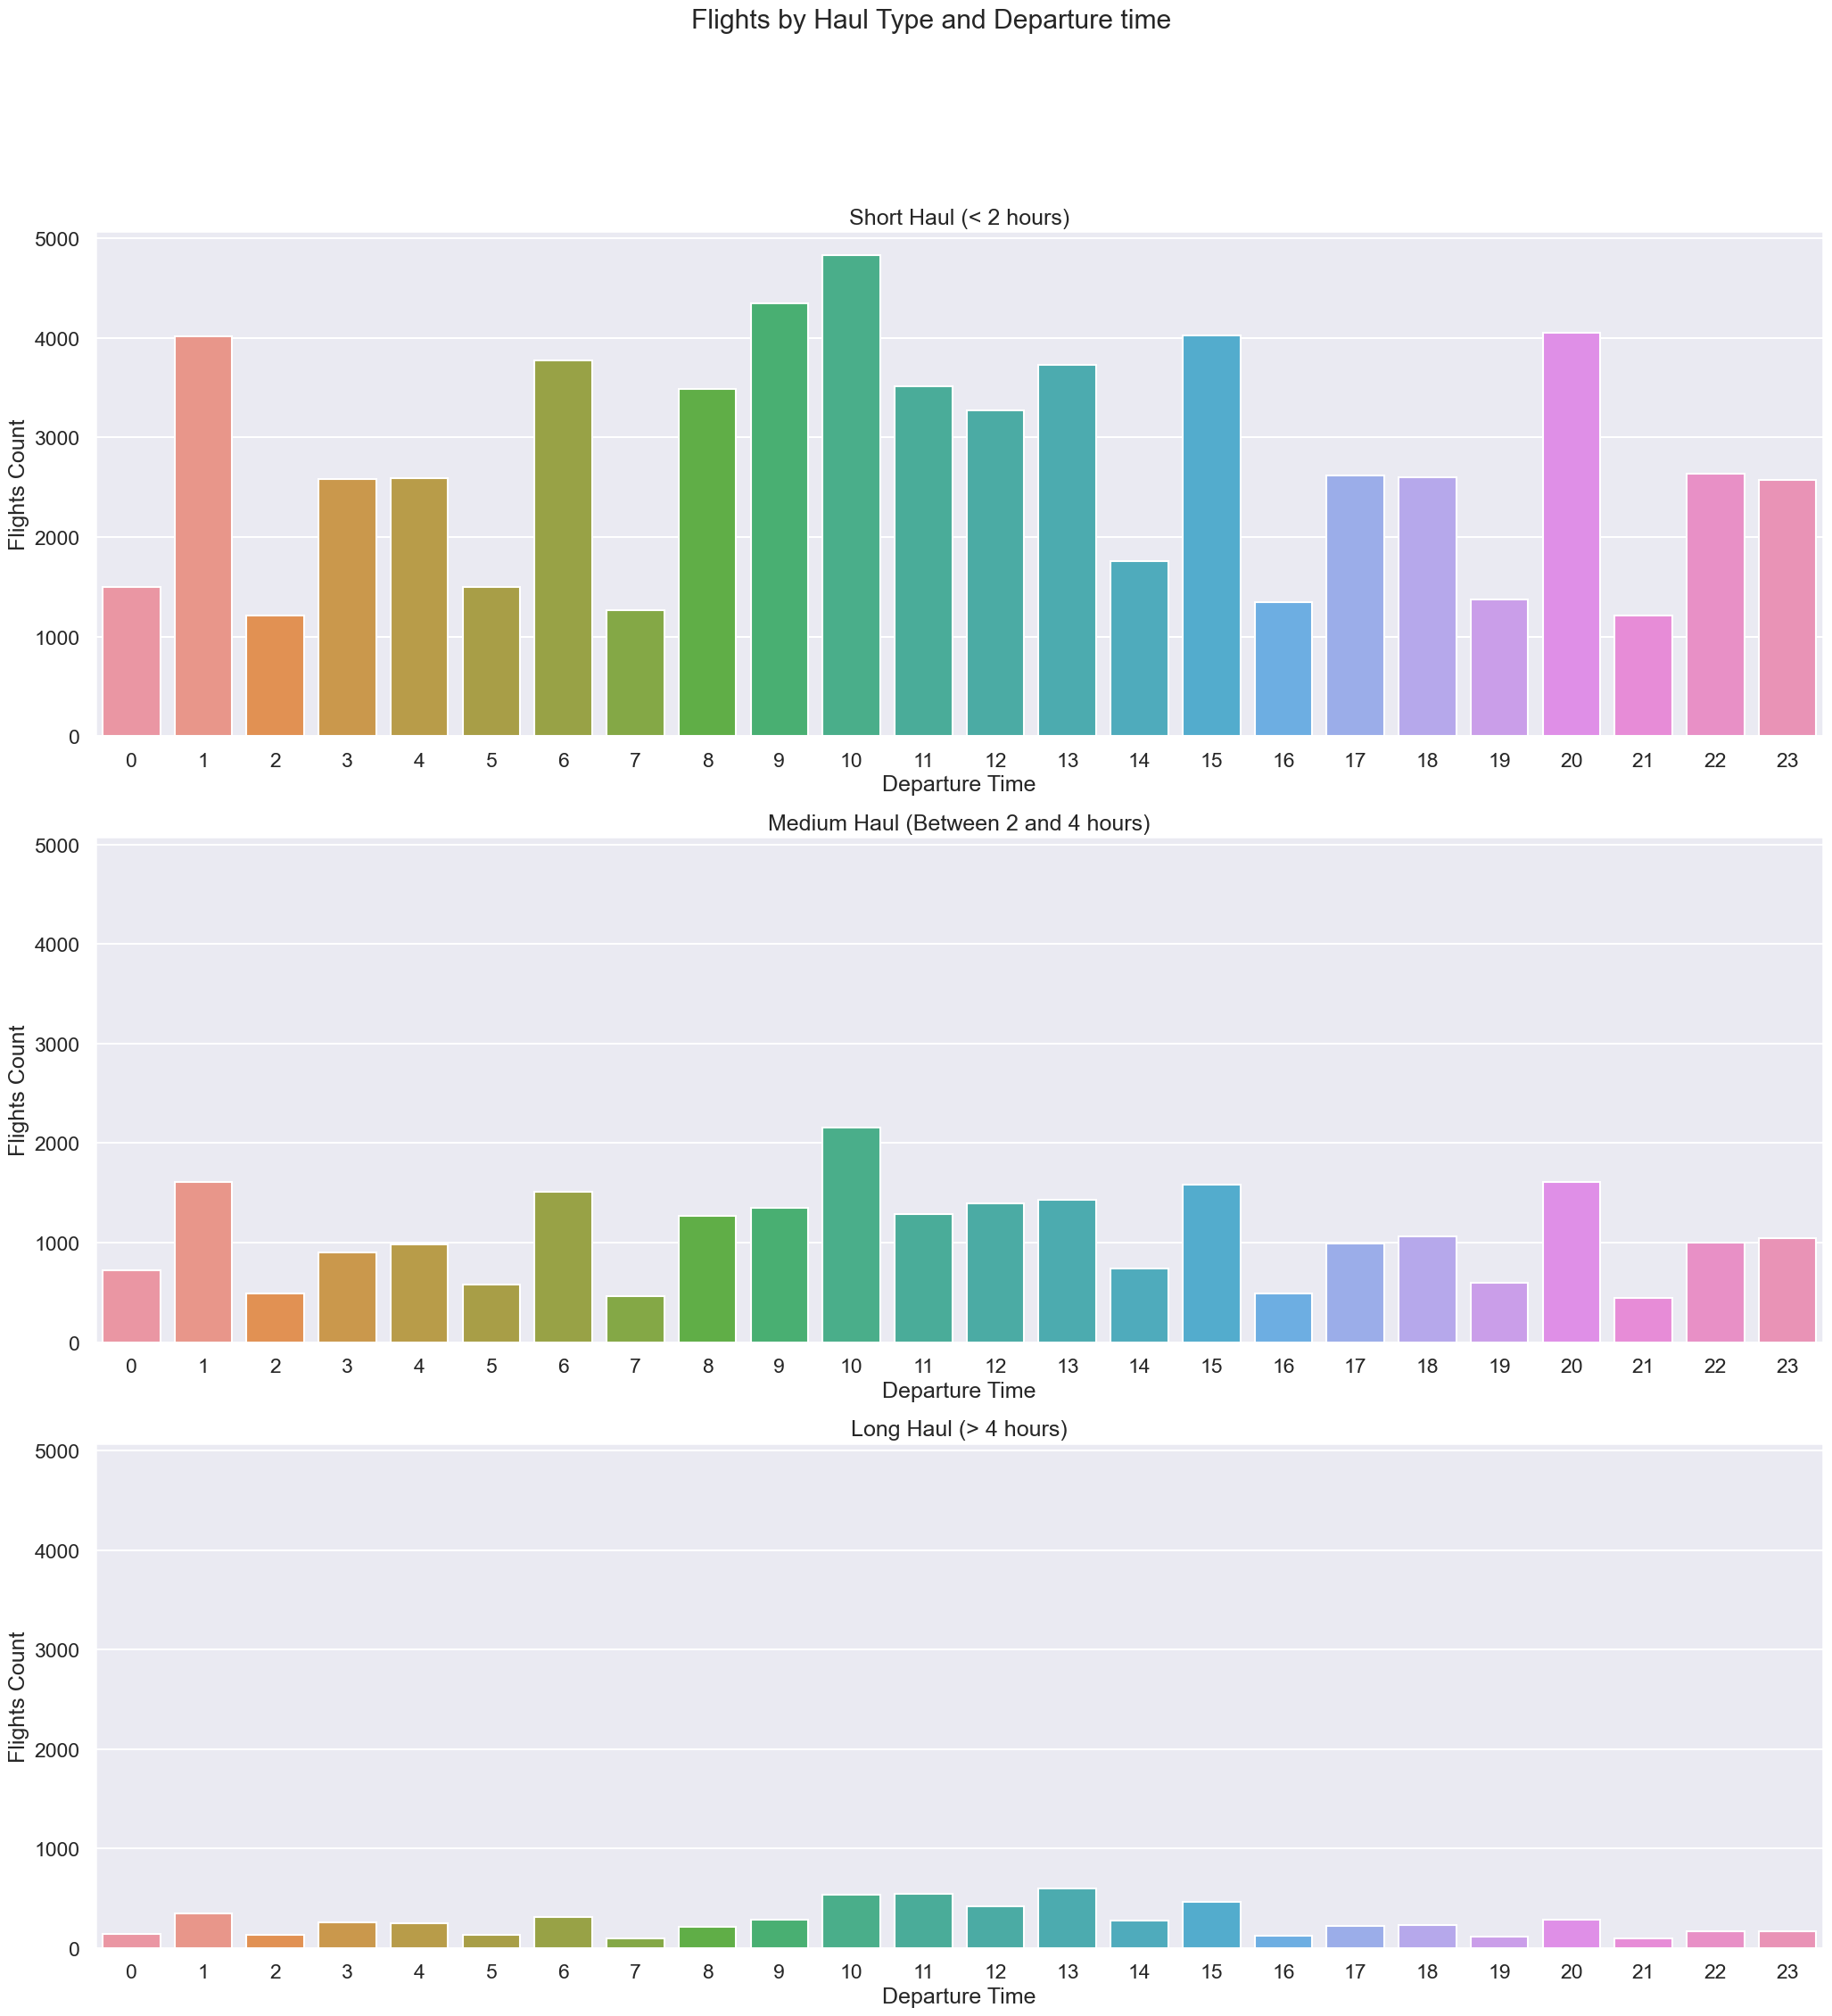

In [79]:
#Graphs with all the Haul Types by hours
fig, ax = plt.subplots(3, 1, figsize=(25, 25), sharey=True)
fig.suptitle('Flights by Haul Type and Departure time')

sns.countplot(x='hour', data= df_haul_processed[df_haul_processed['HaulType'] == 'Short'] , ax=ax[0])
ax[0].set(xlabel='Departure Time', ylabel='Flights Count')
ax[0].set_title('Short Haul (< 2 hours)')
sns.countplot(x='hour', data= df_haul_processed[df_haul_processed['HaulType'] == 'Medium'] , ax=ax[1])
ax[1].set(xlabel='Departure Time', ylabel='Flights Count')
ax[1].set_title('Medium Haul (Between 2 and 4 hours)')
sns.countplot(x='hour', data= df_haul_processed[df_haul_processed['HaulType'] == 'Long'] , ax=ax[2])
ax[2].set(xlabel='Departure Time', ylabel='Flights Count')
ax[2].set_title('Long Haul (> 4 hours)')

    #short <=2 hours
    #Medium between 2 and 4
    #Long > 4
plt.show()

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

In [77]:
df = pd.read_csv('../../data/processed/top10_airports_flights.csv')
df

origin_city_name  total_flights_18_19
0            Chicago, IL               962032
1            Atlanta, GA               785850
2           New York, NY               599657
3  Dallas/Fort Worth, TX               584688
4             Denver, CO               552134
5          Charlotte, NC               501557
6        Los Angeles, CA               500840
7         Washington, DC               472958
8            Houston, TX               472442
9            Seattle, WA               379367

In [78]:
df = pd.read_csv('../../data/processed/top10_airports_passengers.csv')
df

origin_city_name  total_flights_15_19
0            Chicago, IL              2626134
1            Atlanta, GA              2182679
2           New York, NY              1983029
3  Dallas/Fort Worth, TX              1678322
4        Los Angeles, CA              1632958
5            Houston, TX              1431533
6             Denver, CO              1404708
7         Washington, DC              1295165
8          Charlotte, NC              1286340
9            Seattle, WA              1089147

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?

In [80]:
df_flights_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 39 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   FlightDate                           100000 non-null  datetime64[ns]
 1   UniqueMarketingCarrierCode           100000 non-null  object        
 2   UniqueScheduledOperatingCarrierCode  100000 non-null  object        
 3   TailNumber                           99664 non-null   object        
 4   FlightNumber                         100000 non-null  int64         
 5   OriginIATA                           100000 non-null  object        
 6   DestinationIATA                      100000 non-null  object        
 7   DepartureTime                        100000 non-null  object        
 8   ActualDeparture                      98387 non-null   object        
 9   Delay_Departure                      98356 non-null   float64       
 1

In [81]:
df_delays_flights = df_flights_clean[['UniqueMarketingCarrierCode','FlightDate','Delay_Departure','DistanceAirports' ,'FlightMonth','FlightYear']]

df_delays_flights = df_delays_flights.dropna()

df_delays_flights

UniqueMarketingCarrierCode FlightDate  Delay_Departure  \
0                             DL 2018-06-22            209.0   
1                             AA 2018-04-03              2.0   
2                             DL 2019-11-24             -3.0   
3                             DL 2018-01-24             -7.0   
4                             HA 2018-09-23            -11.0   
...                          ...        ...              ...   
99995                         DL 2018-05-10             32.0   
99996                         F9 2019-10-28             -8.0   
99997                         DL 2019-10-01             -5.0   
99998                         UA 2018-10-15            124.0   
99999                         AA 2019-10-14              1.0   

       DistanceAirports  FlightMonth  FlightYear  
0                   134            6        2018  
1                   157            4        2018  
2                  1282           11        2019  
3                   214            1        2018  
4                    84            9        2018  
...                 ...          ...         ...  
99995               377            5        2018  
99996               628           10        2019  
99997               606           10        2019  
99998               483           10        2018  
99999               468           10        2019  

[98356 rows x 6 columns]

In [86]:
df_sum_monthly_delay = df_delays_flights.groupby(['UniqueMarketingCarrierCode','FlightYear','FlightMonth'], group_keys=False).sum()
df_sum_monthly_delay

df_sum_monthly = df_sum_monthly_delay.index.to_frame().join(df_sum_monthly_delay)
df_sum_monthly = df_sum_monthly.reset_index(level=0, drop=True)
df_sum_monthly = df_sum_monthly.reset_index(level=0, drop=True)
df_sum_monthly = df_sum_monthly.reset_index(level=0, drop=True)
df_sum_monthly

UniqueMarketingCarrierCode  FlightYear  FlightMonth  Delay_Departure  \
0                           AA        2018            1          10335.0   
1                           AA        2018            2          10219.0   
2                           AA        2018            3           4184.0   
3                           AA        2018            4           6129.0   
4                           AA        2018            5          12456.0   
..                         ...         ...          ...              ...   
238                         WN        2019            8           7742.0   
239                         WN        2019            9           4368.0   
240                         WN        2019           10           6348.0   
241                         WN        2019           11           5706.0   
242                         WN        2019           12           9674.0   

     DistanceAirports  
0              699310  
1              650011  
2              731911  
3              663704  
4              750173  
..                ...  
238            486001  
239            533726  
240            508397  
241            534127  
242            564685  

[243 rows x 5 columns]

In [87]:
df_sum_monthly.rename(columns={'UniqueMarketingCarrierCode': 'AirlineCode'}, inplace=True) 
df_sum_monthly
    

AirlineCode  FlightYear  FlightMonth  Delay_Departure  DistanceAirports
0            AA        2018            1          10335.0            699310
1            AA        2018            2          10219.0            650011
2            AA        2018            3           4184.0            731911
3            AA        2018            4           6129.0            663704
4            AA        2018            5          12456.0            750173
..          ...         ...          ...              ...               ...
238          WN        2019            8           7742.0            486001
239          WN        2019            9           4368.0            533726
240          WN        2019           10           6348.0            508397
241          WN        2019           11           5706.0            534127
242          WN        2019           12           9674.0            564685

[243 rows x 5 columns]

In [88]:
#Monthly Delay by Carrier
df_sum_montly_delays=df_sum_monthly[['AirlineCode','FlightYear','FlightMonth','Delay_Departure']]
df_sum_montly_delays

AirlineCode  FlightYear  FlightMonth  Delay_Departure
0            AA        2018            1          10335.0
1            AA        2018            2          10219.0
2            AA        2018            3           4184.0
3            AA        2018            4           6129.0
4            AA        2018            5          12456.0
..          ...         ...          ...              ...
238          WN        2019            8           7742.0
239          WN        2019            9           4368.0
240          WN        2019           10           6348.0
241          WN        2019           11           5706.0
242          WN        2019           12           9674.0

[243 rows x 4 columns]

In [89]:
#Montly Distance by carrier
df_sum_montly_distance =df_sum_monthly[['AirlineCode','FlightYear','FlightMonth','DistanceAirports']]
df_sum_montly_distance

AirlineCode  FlightYear  FlightMonth  DistanceAirports
0            AA        2018            1            699310
1            AA        2018            2            650011
2            AA        2018            3            731911
3            AA        2018            4            663704
4            AA        2018            5            750173
..          ...         ...          ...               ...
238          WN        2019            8            486001
239          WN        2019            9            533726
240          WN        2019           10            508397
241          WN        2019           11            534127
242          WN        2019           12            564685

[243 rows x 4 columns]

In [90]:
#Passenger carried by Airline
df_passengers = pd.read_csv("../../data/raw/passengersSample.csv")
df_passengers

seats  passengers  distance unique_carrier  year  month class
0          9           0       176             GV  2018      9     F
1          6           3        24             K2  2019     10     L
2        160          85      1430             AA  2018     11     F
3          9           2       128             5V  2019     11     L
4       4004        3484       999             WN  2018      8     F
...      ...         ...       ...            ...   ...    ...   ...
99995   3900        3635       599             AA  2019      8     F
99996    669         625      4101             DL  2018      9     F
99997    173           0      2095             GL  2019      9     L
99998   9858        8825      2381             B6  2019      5     F
99999   2976        2557      1452             F9  2018      7     F

[100000 rows x 7 columns]

In [91]:
df_passengers_total = df_passengers[['unique_carrier','passengers']]

df_passengers_total= df_passengers_total[df_passengers_total['passengers'] != 0]
df_passengers_total.rename(columns={'unique_carrier': 'AirlineCode'}, inplace=True) 
df_passengers_total

AirlineCode  passengers
1              K2           3
2              AA          85
3              5V           2
4              WN        3484
6              UA        3499
...           ...         ...
99992         0CQ           1
99995          AA        3635
99996          DL         625
99998          B6        8825
99999          F9        2557

[82149 rows x 2 columns]

In [92]:
df_sum_passengers_airline = df_passengers_total.groupby(['AirlineCode']).sum().reset_index()

df_sum_passengers_airline.sort_values(by=['passengers'], ascending=False) 

AirlineCode  passengers
259          WN    35217616
79           AA    32784968
118          DL    32553519
243          UA    23883750
97           B6     8799146
..          ...         ...
9           0UQ           4
260         WRD           4
223         RVQ           4
11          10Q           2
133          FP           2

[277 rows x 2 columns]

In [93]:
# Total fuel comsumption per air carrier.
df_fuel  = pd.read_csv("../../data/raw/fuel_comsumption.csv")
df_fuel_comsumption = df_fuel[['unique_carrier','carrier_name','total_gallons','total_cost']]
df_fuel_comsumption.dropna()
df_fuel_comsumption

unique_carrier                                       carrier_name  \
0               09Q  Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...   
1               0WQ                                  Avjet Corporation   
2               1BQ        Eastern Airlines f/k/a Dynamic Airways, LLC   
3               27Q                 Jet Aviation Flight Services, Inc.   
4               2HQ                                  Elite Airways LLC   
...             ...                                                ...   
1053             X9                         Omni Air International LLC   
1054             XP                                       XTRA Airways   
1055             YV                                 Mesa Airlines Inc.   
1056             YX                                   Republic Airline   
1057             WN                             Southwest Airlines Co.   

      total_gallons  total_cost  
0         1235210.0     3449957  
1               0.0           0  
2           60821.0      176988  
3               0.0           0  
4          410186.0     1518919  
...             ...         ...  
1053      2531738.0     6172701  
1054            0.0           0  
1055            0.0           0  
1056        21048.0       50043  
1057    175889193.0   357550908  

[1058 rows x 4 columns]

In [94]:
df_fuel_comsumption = df_fuel_comsumption[df_fuel_comsumption['total_gallons'] != 0]
df_fuel_comsumption.rename(columns={'unique_carrier': 'AirlineCode'}, inplace=True)
df_fuel_comsumption.rename(columns={'carrier_name': 'AirlineName'}, inplace=True)
df_fuel_comsumption

AirlineCode                                        AirlineName  \
0            09Q  Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...   
2            1BQ        Eastern Airlines f/k/a Dynamic Airways, LLC   
4            2HQ                                  Elite Airways LLC   
6             5V  Tatonduk Outfitters Limited d/b/a Everts Air A...   
7             5X                              United Parcel Service   
...          ...                                                ...   
1051          WI                                    Sky Lease Cargo   
1052          WL  Caribbean Sun Airlines, Inc. d/b/a World Atlan...   
1053          X9                         Omni Air International LLC   
1056          YX                                   Republic Airline   
1057          WN                             Southwest Airlines Co.   

      total_gallons  total_cost  
0         1235210.0     3449957  
2           60821.0      176988  
4          410186.0     1518919  
6          304851.0      792440  
7        73210000.0   133562000  
...             ...         ...  
1051       788547.0     1793535  
1052        64970.0      168103  
1053      2531738.0     6172701  
1056        21048.0       50043  
1057    175889193.0   357550908  

[828 rows x 4 columns]

In [95]:
df_fuel_comsumption_carrier = df_fuel_comsumption.groupby(['AirlineCode']).sum().reset_index()


df_fuel_comsumption_carrier.sort_values(by=['total_gallons'], ascending=False) 

AirlineCode  total_gallons   total_cost
9           AA   6.416096e+09  13069982821
13          DL   6.310645e+09  13415228189
34          UA   6.123717e+09  12627729183
37          WN   3.648209e+09   7489788379
15          FX   2.075059e+09   4248786486
5           5X   1.523490e+09   3115165000
12          B6   1.515474e+09   3291672014
11          AS   1.275982e+09   2878694746
6           5Y   9.677969e+08   2125488689
28          NK   7.666939e+08   1687812540
19          HA   4.753299e+08    967317832
14          F9   4.728716e+08    931830411
16          G4   3.404517e+08    769787007
31          PO   3.201268e+08    651374333
29          OO   1.750844e+08    424845558
8           9S   1.512969e+08    338466203
20         KAQ   1.336774e+08    309403902
32          SY   9.167172e+07    273419896
38          X9   7.764875e+07    186815355
21          KD   5.140127e+07    107214104
25          M6   4.192460e+07     93763529
35          WI   3.067892e+07     69832020
0          09Q   3.030427e+07     76146698
26          N8   1.924860e+07     63705015
7           8C   1.554831e+07     38367573
18          GL   1.156546e+07     32522889
33          U7   1.094250e+07     23739832
27          NC   8.446353e+06     19617730
22          KH   8.404593e+06     17063469
4           5V   7.895278e+06     21989573
30         PFQ   7.434311e+06     17180208
17         GFQ   6.741599e+06     18027305
3          2HQ   6.080250e+06     23754366
24          L2   5.305314e+06     13662876
23         KLQ   4.134408e+06     11189462
10         ABX   3.271677e+06      4973218
36          WL   2.425627e+06      5543326
39          XP   1.900924e+06      4575063
2          1BQ   1.862466e+06      5964173
40          YX   5.255570e+05      1241169
1          0WQ   9.156700e+04       327406